In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
features=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
features

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1=features[['timestamp', 'RRU.MaxLayerDlMimo','PEE.AvgPower', 'RRU.PrbUsedDl', 'RRU.PrbUsedUl']].copy()
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1.insert(df_1.columns.get_loc('timestamp') + 1, 'datetime_column', convert_time)
df_1.set_index('datetime_column', inplace=True)
df_1.drop(columns=['timestamp'], inplace=True)
df_2= df_1.resample('T').max()
print("df_2 shape", df_2.shape)
display(df_2.head())

df_2 shape (10080, 4)


,RRU.MaxLayerDlMimo,PEE.AvgPower,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,,,
2022-12-31 16:00:00,0.500000,327.670502,125.483333,118.30
2022-12-31 16:01:00,0.483333,337.544902,125.983333,122.85
2022-12-31 16:02:00,0.483333,340.634705,123.616667,113.75
2022-12-31 16:03:00,0.450000,340.634705,120.216667,109.20
2022-12-31 16:04:00,0.550000,336.958906,150.150000,145.60


In [4]:
def split_input_to_timestep(data, timestep):
    x_dictionary = {}
    for i in range(0,data.shape[1]):
        x_dictionary['x%d'%i] = [data[_:_+timestep, i] for _ in range(data.shape[0] - timestep)]
    x_final =np.stack(list(x_dictionary.values()), axis=2)
    return x_final

In [5]:
df_final=df_2.astype(float).copy()
X= split_input_to_timestep(df_final[['RRU.MaxLayerDlMimo','PEE.AvgPower']].to_numpy(), 60)
y=  df_final[[ 'RRU.PrbUsedDl', 'RRU.PrbUsedUl']].to_numpy()[60:]
print(X.shape)
print(y.shape)

(10020, 60, 2)
(10020, 2)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units = 10, activation="tanh" ,return_sequences = True, input_shape = (X.shape[1], X.shape[2])))

model.add(LSTM(units = 10, return_sequences = True,activation="tanh"))

model.add(LSTM(units = 10,return_sequences = False,activation="tanh" ))

model.add(Dense(units =2))

model.compile(loss='mse', optimizer='adam',metrics=['mse'])
model.summary()

model.fit(X, y, batch_size=60,epochs=int(1), validation_split=0.2)
yhat = model.predict(X, verbose = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 10)            520       
                                                                 
 lstm_1 (LSTM)               (None, 60, 10)            840       
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 2)                 22        
                                                                 
Total params: 2,222
Trainable params: 2,222
Non-trainable params: 0
_________________________________________________________________
314/314 [==============================] - 2s 5ms/step


In [10]:
x_train_scaled, x_train_scaler=scaler_data(x_train)
x_train_scaled= pd.DataFrame(x_train_scaled, columns=x_train.columns)
y_train_scaled, y_train_scaler=scaler_data(y_train)

x_validation_scaled, x_validation_scaler = scaler_data(x_validation)
x_validation_scaled = pd.DataFrame(x_validation_scaled, columns=x_validation.columns)
y_validation_scaled, y_validation_scaler = scaler_data(y_validation)

In [11]:
timestep=60
x_train_scaled_final= split_input_to_timestep(x_train_scaled.to_numpy(), timestep=timestep)
y_train_scaled_final=y_train_scaled[60:]
print("shape y_train after %d timestep:"%timestep, y_train_scaled_final.shape)
print("shape x_train after split into %d timestep:"%timestep, x_train_scaled_final.shape)

x_validation_scaled_final = split_input_to_timestep(x_validation_scaled.to_numpy(), timestep=timestep)
y_validation_scaled_final = y_validation_scaled[60:]
print("shape y_validation after %d timestep:" % timestep, y_validation_scaled_final.shape)
print("shape x_validation after split into %d timestep:" % timestep, x_validation_scaled_final.shape)

shape y_train after 60 timestep: (9060, 2)
shape x_train after split into 60 timestep: (9060, 60, 6)
shape y_validation after 60 timestep: (900, 2)
shape x_validation after split into 60 timestep: (900, 60, 6)


In [12]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
timestamp

'20240708_1151'

In [13]:
model_lstm, loss, MSE, MAE      = tensorflow_lstm(x_train_scaled_final, y_train_scaled_final, x_validation_scaled_final, y_validation_scaled_final,
                                                  learning_rate=0.001, target_MAE=0.1,  jumlah_epochs=10, jumlah_sampel_batch=60, 
                                                  jumlah_epoch_terbelakang=3,  save_best_model_path = 'MAE_lowest_%s.hdf5'%timestamp, 
                                                  validation_data=True, load_model=None)

Epoch 1/10
151/151 [==============================] - ETA: 0s - loss: 0.9999 - mse: 0.9999 - mae: 0.7954
Epoch 1: val_mae improved from inf to 0.79684, saving model to MAE_lowest_20240708_1151.hdf5
151/151 [==============================] - 35s 211ms/step - loss: 0.9999 - mse: 0.9999 - mae: 0.7954 - val_loss: 0.9978 - val_mse: 0.9978 - val_mae: 0.7968
Epoch 2/10
151/151 [==============================] - ETA: 0s - loss: 0.9941 - mse: 0.9941 - mae: 0.7929
Epoch 2: val_mae improved from 0.79684 to 0.78805, saving model to MAE_lowest_20240708_1151.hdf5
151/151 [==============================] - 29s 195ms/step - loss: 0.9941 - mse: 0.9941 - mae: 0.7929 - val_loss: 0.9827 - val_mse: 0.9827 - val_mae: 0.7880
Epoch 3/10
151/151 [==============================] - ETA: 0s - loss: 0.9842 - mse: 0.9842 - mae: 0.7882
Epoch 3: val_mae did not improve from 0.78805
151/151 [==============================] - 31s 208ms/step - loss: 0.9842 - mse: 0.9842 - mae: 0.7882 - val_loss: 0.9897 - val_mse: 0.9897

In [14]:
nama_file='%s.hdf5'%timestamp
model_lstm.save(filepath=nama_file)

In [24]:
def model_tensorflow(time_step, jumlah_fitur, x_test, pilih_models):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=200, input_shape=(time_step, jumlah_fitur), return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.LSTM(units=100, return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='linear'))

    model.load_weights(filepath=pilih_models)
    return model.predict(x_test)

In [25]:
hasil= model_tensorflow(time_step=60, jumlah_fitur=x_validation_scaled_final.shape[2], x_test=x_validation_scaled_final, pilih_models='MAE_lowest_20240708_1151.hdf5')

29/29 [==============================] - 1s 23ms/step


In [26]:
predictions =   y_validation_scaler.inverse_transform(hasil)
actual      =   y_validation_scaler.inverse_transform(y_validation_scaled_final)
print("predictions.shape:", predictions.shape, "actual.shape:", actual.shape)

predictions.shape: (900, 2) actual.shape: (900, 2)


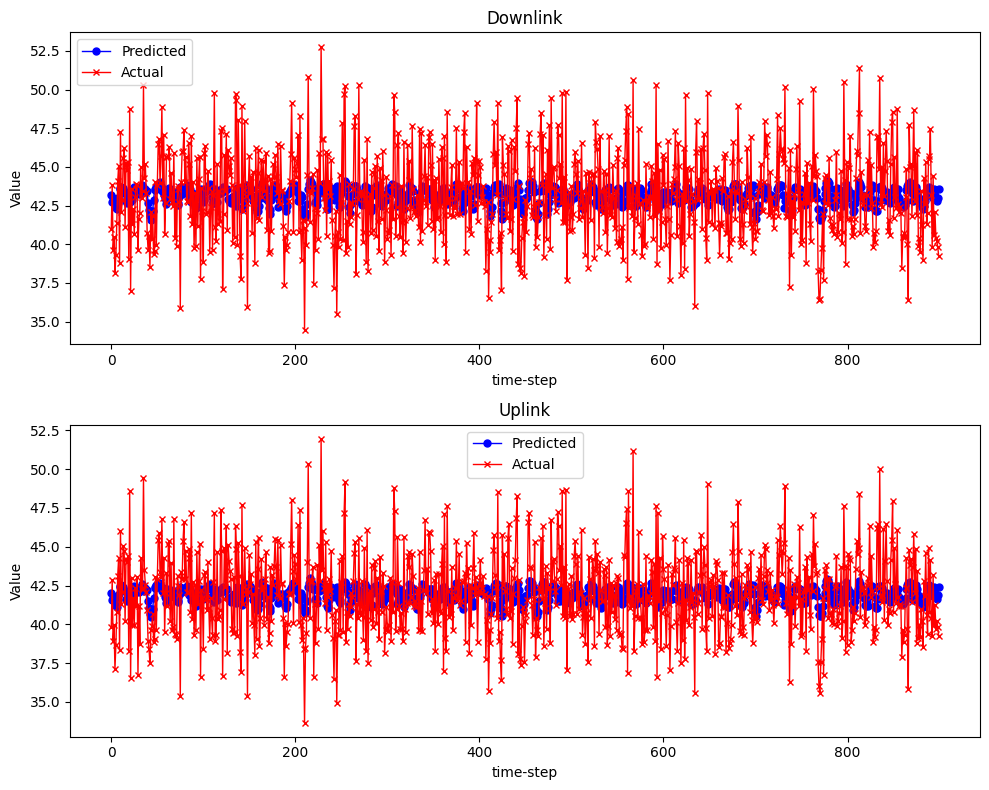

In [27]:
import matplotlib.pyplot as plt

# Assuming predictions and actual are numpy arrays of shape (900, 2)
feature_names = ['Downlink', 'Uplink']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for i in range(2):
    axs[i].plot(predictions[:, i], label='Predicted', color='blue', marker='o', linestyle='-', markersize=5, linewidth=1)
    axs[i].plot(actual[:, i], label='Actual', color='red', marker='x', linestyle='-', markersize=5, linewidth=1)
    axs[i].set_title(feature_names[i])
    axs[i].set_xlabel('time-step')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()